# 1. Import and Install Dependencies

In [1]:
#!pip install mediapipe

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                            mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                            mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1))
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                               mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                               mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                               ) 


In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame, results)

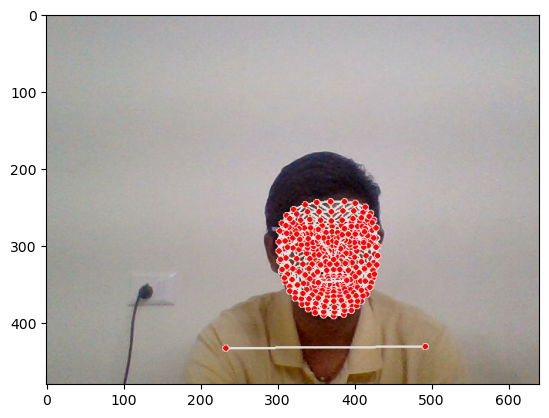

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
face

array([ 0.58383858,  0.71027511, -0.02656143, ...,  0.64619321,
        0.5893901 ,  0.01755944])

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.58404505,  0.6625765 , -0.93148738, ...,  0.        ,
        0.        ,  0.        ])

In [17]:
468*3+33*4+21*3+21*3

1662

In [18]:
np.save('0', result_test)

In [19]:
np.load('0.npy')

array([ 0.58404505,  0.6625765 , -0.93148738, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [20]:
# Path for exported data, numpy arrays
DATA_PATH = "C:/Users/bsai3/Downloads/images"

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'yes',"no"])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [22]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [23]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [24]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num, label in enumerate(actions)}

In [27]:
label_map

{'hello': 0, 'thanks': 1, 'yes': 2, 'no': 3}

In [28]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [29]:
np.array(sequences).shape

(120, 30, 1662)

In [30]:
np.array(labels).shape

(120,)

In [31]:
X = np.array(sequences)

In [32]:
X.shape

(120, 30, 1662)

In [33]:
y = to_categorical(labels).astype(int)

In [34]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 0, 0],
       [0, 1,

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [36]:
y_test.shape

(6, 4)

# 7. Build and Train LSTM Neural Network

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [54]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [55]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [56]:
res = [.7, 0.2, 0.1]

In [57]:
actions[np.argmax(res)]

'hello'

In [58]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [59]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
4/4 [==============================] - 4s 38ms/step - loss: 13.0507 - categorical_accuracy: 0.2456
Epoch 2/2000
4/4 [==============================] - 0s 32ms/step - loss: 23.6944 - categorical_accuracy: 0.2193
Epoch 3/2000
4/4 [==============================] - 0s 31ms/step - loss: 19.2680 - categorical_accuracy: 0.3158
Epoch 4/2000
4/4 [==============================] - 0s 31ms/step - loss: 15.2278 - categorical_accuracy: 0.2105
Epoch 5/2000
4/4 [==============================] - 0s 34ms/step - loss: 11.1909 - categorical_accuracy: 0.2895
Epoch 6/2000
4/4 [==============================] - 0s 32ms/step - loss: 46.3063 - categorical_accuracy: 0.2456
Epoch 7/2000
4/4 [==============================] - 0s 32ms/step - loss: 183.1367 - categorical_accuracy: 0.2632
Epoch 8/2000
4/4 [==============================] - 0s 31ms/step - loss: 361.5664 - categorical_accuracy: 0.2632
Epoch 9/2000
4/4 [==============================] - 0s 31ms/step - loss: 734.2231 - categorical_accura

Epoch 73/2000
4/4 [==============================] - 0s 31ms/step - loss: 161.0072 - categorical_accuracy: 0.3333
Epoch 74/2000
4/4 [==============================] - 0s 31ms/step - loss: 141.4874 - categorical_accuracy: 0.2982
Epoch 75/2000
4/4 [==============================] - 0s 31ms/step - loss: 251.8517 - categorical_accuracy: 0.2719
Epoch 76/2000
4/4 [==============================] - 0s 30ms/step - loss: 131.6921 - categorical_accuracy: 0.2982
Epoch 77/2000
4/4 [==============================] - 0s 31ms/step - loss: 125.5654 - categorical_accuracy: 0.2368
Epoch 78/2000
4/4 [==============================] - 0s 33ms/step - loss: 82.9447 - categorical_accuracy: 0.2895
Epoch 79/2000
4/4 [==============================] - 0s 31ms/step - loss: 43.4253 - categorical_accuracy: 0.3070
Epoch 80/2000
4/4 [==============================] - 0s 30ms/step - loss: 48.1910 - categorical_accuracy: 0.2895
Epoch 81/2000
4/4 [==============================] - 0s 31ms/step - loss: 46.3539 - categor

Epoch 216/2000
4/4 [==============================] - 0s 35ms/step - loss: 30.2717 - categorical_accuracy: 0.4737
Epoch 217/2000
4/4 [==============================] - 0s 35ms/step - loss: 47.0530 - categorical_accuracy: 0.5000
Epoch 218/2000
4/4 [==============================] - 0s 44ms/step - loss: 33.6416 - categorical_accuracy: 0.4649
Epoch 219/2000
4/4 [==============================] - 0s 41ms/step - loss: 38.9958 - categorical_accuracy: 0.4825
Epoch 220/2000
4/4 [==============================] - 0s 37ms/step - loss: 29.4045 - categorical_accuracy: 0.4737
Epoch 221/2000
4/4 [==============================] - 0s 36ms/step - loss: 42.3126 - categorical_accuracy: 0.5175
Epoch 222/2000
4/4 [==============================] - 0s 34ms/step - loss: 35.3618 - categorical_accuracy: 0.5263
Epoch 223/2000
4/4 [==============================] - 0s 34ms/step - loss: 15.2349 - categorical_accuracy: 0.5088
Epoch 224/2000
4/4 [==============================] - 0s 36ms/step - loss: 5.9303 - cate

4/4 [==============================] - 0s 38ms/step - loss: 15.8217 - categorical_accuracy: 0.4035
Epoch 289/2000
4/4 [==============================] - 0s 34ms/step - loss: 14.5000 - categorical_accuracy: 0.4561
Epoch 290/2000
4/4 [==============================] - 0s 39ms/step - loss: 93.9110 - categorical_accuracy: 0.4825
Epoch 291/2000
4/4 [==============================] - 0s 35ms/step - loss: 65.2593 - categorical_accuracy: 0.3772
Epoch 292/2000
4/4 [==============================] - 0s 33ms/step - loss: 507.4687 - categorical_accuracy: 0.2719
Epoch 293/2000
4/4 [==============================] - 0s 34ms/step - loss: 292.5807 - categorical_accuracy: 0.2895
Epoch 294/2000
4/4 [==============================] - 0s 32ms/step - loss: 681.2274 - categorical_accuracy: 0.3333
Epoch 295/2000
4/4 [==============================] - 0s 32ms/step - loss: 916.4764 - categorical_accuracy: 0.2719
Epoch 296/2000
4/4 [==============================] - 0s 32ms/step - loss: 791.8633 - categorical_a

4/4 [==============================] - 0s 33ms/step - loss: 1.2443 - categorical_accuracy: 0.4912
Epoch 433/2000
4/4 [==============================] - 0s 30ms/step - loss: 1.2428 - categorical_accuracy: 0.4912
Epoch 434/2000
4/4 [==============================] - 0s 31ms/step - loss: 1.2433 - categorical_accuracy: 0.4737
Epoch 435/2000
4/4 [==============================] - 0s 33ms/step - loss: 1.2378 - categorical_accuracy: 0.4825
Epoch 436/2000
4/4 [==============================] - 0s 31ms/step - loss: 1.2329 - categorical_accuracy: 0.5000
Epoch 437/2000
4/4 [==============================] - 0s 32ms/step - loss: 1.2339 - categorical_accuracy: 0.5175
Epoch 438/2000
4/4 [==============================] - 0s 35ms/step - loss: 1.2299 - categorical_accuracy: 0.5000
Epoch 439/2000
4/4 [==============================] - 0s 34ms/step - loss: 1.2286 - categorical_accuracy: 0.5000
Epoch 440/2000
4/4 [==============================] - 0s 34ms/step - loss: 1.2215 - categorical_accuracy: 0.526

4/4 [==============================] - 0s 32ms/step - loss: 0.9359 - categorical_accuracy: 0.6579
Epoch 577/2000
4/4 [==============================] - 0s 31ms/step - loss: 0.9356 - categorical_accuracy: 0.6579
Epoch 578/2000
4/4 [==============================] - 0s 30ms/step - loss: 0.9317 - categorical_accuracy: 0.6579
Epoch 579/2000
4/4 [==============================] - 0s 32ms/step - loss: 0.9278 - categorical_accuracy: 0.6579
Epoch 580/2000
4/4 [==============================] - 0s 33ms/step - loss: 0.9250 - categorical_accuracy: 0.6579
Epoch 581/2000
4/4 [==============================] - 0s 32ms/step - loss: 0.9250 - categorical_accuracy: 0.6579
Epoch 582/2000
4/4 [==============================] - 0s 31ms/step - loss: 0.9231 - categorical_accuracy: 0.6579
Epoch 583/2000
4/4 [==============================] - 0s 33ms/step - loss: 0.9185 - categorical_accuracy: 0.6579
Epoch 584/2000
4/4 [==============================] - 0s 32ms/step - loss: 0.9184 - categorical_accuracy: 0.657

4/4 [==============================] - 0s 30ms/step - loss: 0.7758 - categorical_accuracy: 0.6667
Epoch 721/2000
4/4 [==============================] - 0s 30ms/step - loss: 0.7741 - categorical_accuracy: 0.7018
Epoch 722/2000
4/4 [==============================] - 0s 30ms/step - loss: 0.7750 - categorical_accuracy: 0.7018
Epoch 723/2000
4/4 [==============================] - 0s 31ms/step - loss: 0.7602 - categorical_accuracy: 0.7018
Epoch 724/2000
4/4 [==============================] - 0s 31ms/step - loss: 0.7634 - categorical_accuracy: 0.6842
Epoch 725/2000
4/4 [==============================] - 0s 31ms/step - loss: 0.7583 - categorical_accuracy: 0.7018
Epoch 726/2000
4/4 [==============================] - 0s 32ms/step - loss: 0.7583 - categorical_accuracy: 0.7105
Epoch 727/2000
4/4 [==============================] - 0s 33ms/step - loss: 0.7560 - categorical_accuracy: 0.7105
Epoch 728/2000
4/4 [==============================] - 0s 32ms/step - loss: 0.7575 - categorical_accuracy: 0.693

4/4 [==============================] - 0s 32ms/step - loss: 0.6639 - categorical_accuracy: 0.7105
Epoch 865/2000
4/4 [==============================] - 0s 31ms/step - loss: 0.6605 - categorical_accuracy: 0.7018
Epoch 866/2000
4/4 [==============================] - 0s 31ms/step - loss: 0.6596 - categorical_accuracy: 0.7105
Epoch 867/2000
4/4 [==============================] - 0s 30ms/step - loss: 0.6553 - categorical_accuracy: 0.7018
Epoch 868/2000
4/4 [==============================] - 0s 31ms/step - loss: 0.6546 - categorical_accuracy: 0.7193
Epoch 869/2000
4/4 [==============================] - 0s 33ms/step - loss: 0.6541 - categorical_accuracy: 0.7018
Epoch 870/2000
4/4 [==============================] - 0s 31ms/step - loss: 0.6500 - categorical_accuracy: 0.7105
Epoch 871/2000
4/4 [==============================] - 0s 30ms/step - loss: 0.6566 - categorical_accuracy: 0.7105
Epoch 872/2000
4/4 [==============================] - 0s 32ms/step - loss: 0.6471 - categorical_accuracy: 0.710

4/4 [==============================] - 0s 36ms/step - loss: 0.5588 - categorical_accuracy: 0.7368
Epoch 1009/2000
4/4 [==============================] - 0s 36ms/step - loss: 0.5556 - categorical_accuracy: 0.7544
Epoch 1010/2000
4/4 [==============================] - 0s 36ms/step - loss: 0.5529 - categorical_accuracy: 0.7368
Epoch 1011/2000
4/4 [==============================] - 0s 35ms/step - loss: 0.5578 - categorical_accuracy: 0.7632
Epoch 1012/2000
4/4 [==============================] - 0s 35ms/step - loss: 0.5411 - categorical_accuracy: 0.7895
Epoch 1013/2000
4/4 [==============================] - 0s 38ms/step - loss: 0.5580 - categorical_accuracy: 0.7544
Epoch 1014/2000
4/4 [==============================] - 0s 36ms/step - loss: 0.5468 - categorical_accuracy: 0.7544
Epoch 1015/2000
4/4 [==============================] - 0s 38ms/step - loss: 0.5377 - categorical_accuracy: 0.7544
Epoch 1016/2000
4/4 [==============================] - 0s 37ms/step - loss: 0.5358 - categorical_accurac

4/4 [==============================] - 0s 35ms/step - loss: 1.4095 - categorical_accuracy: 0.2368
Epoch 1151/2000
4/4 [==============================] - 0s 35ms/step - loss: 1.4089 - categorical_accuracy: 0.2368
Epoch 1152/2000
4/4 [==============================] - 0s 33ms/step - loss: 1.4085 - categorical_accuracy: 0.2368
Epoch 1153/2000
4/4 [==============================] - 0s 34ms/step - loss: 1.4081 - categorical_accuracy: 0.2368
Epoch 1154/2000
4/4 [==============================] - 0s 35ms/step - loss: 1.4077 - categorical_accuracy: 0.2368
Epoch 1155/2000
4/4 [==============================] - 0s 36ms/step - loss: 1.4072 - categorical_accuracy: 0.2368
Epoch 1156/2000
4/4 [==============================] - 0s 35ms/step - loss: 1.4067 - categorical_accuracy: 0.2368
Epoch 1157/2000
4/4 [==============================] - 0s 34ms/step - loss: 1.4064 - categorical_accuracy: 0.2368
Epoch 1158/2000
4/4 [==============================] - 0s 35ms/step - loss: 1.4060 - categorical_accurac

4/4 [==============================] - 0s 31ms/step - loss: 1.3910 - categorical_accuracy: 0.2368
Epoch 1223/2000
4/4 [==============================] - 0s 37ms/step - loss: 1.3908 - categorical_accuracy: 0.2368
Epoch 1224/2000
4/4 [==============================] - 0s 29ms/step - loss: 1.3908 - categorical_accuracy: 0.2368
Epoch 1225/2000
4/4 [==============================] - 0s 31ms/step - loss: 1.3906 - categorical_accuracy: 0.2368
Epoch 1226/2000
4/4 [==============================] - 0s 30ms/step - loss: 1.3905 - categorical_accuracy: 0.2368
Epoch 1227/2000
4/4 [==============================] - 0s 31ms/step - loss: 1.3905 - categorical_accuracy: 0.2368
Epoch 1228/2000
4/4 [==============================] - 0s 30ms/step - loss: 1.3904 - categorical_accuracy: 0.2368
Epoch 1229/2000
4/4 [==============================] - 0s 31ms/step - loss: 1.3903 - categorical_accuracy: 0.2368
Epoch 1230/2000
4/4 [==============================] - 0s 31ms/step - loss: 1.3902 - categorical_accurac

4/4 [==============================] - 0s 31ms/step - loss: 1.3865 - categorical_accuracy: 0.2368
Epoch 1295/2000
4/4 [==============================] - 0s 31ms/step - loss: 1.3865 - categorical_accuracy: 0.2368
Epoch 1296/2000
4/4 [==============================] - 0s 32ms/step - loss: 1.3864 - categorical_accuracy: 0.2368
Epoch 1297/2000
4/4 [==============================] - 0s 33ms/step - loss: 1.3864 - categorical_accuracy: 0.2368
Epoch 1298/2000
4/4 [==============================] - 0s 32ms/step - loss: 1.3864 - categorical_accuracy: 0.2368
Epoch 1299/2000
4/4 [==============================] - 0s 32ms/step - loss: 1.3863 - categorical_accuracy: 0.2368
Epoch 1300/2000
4/4 [==============================] - 0s 32ms/step - loss: 1.3863 - categorical_accuracy: 0.2368
Epoch 1301/2000
4/4 [==============================] - 0s 35ms/step - loss: 1.3863 - categorical_accuracy: 0.2368
Epoch 1302/2000
4/4 [==============================] - 0s 34ms/step - loss: 1.3863 - categorical_accurac

4/4 [==============================] - 0s 31ms/step - loss: 1.3852 - categorical_accuracy: 0.2632
Epoch 1367/2000
4/4 [==============================] - 0s 30ms/step - loss: 1.3853 - categorical_accuracy: 0.2632
Epoch 1368/2000
4/4 [==============================] - 0s 30ms/step - loss: 1.3852 - categorical_accuracy: 0.2632
Epoch 1369/2000
4/4 [==============================] - 0s 30ms/step - loss: 1.3852 - categorical_accuracy: 0.2632
Epoch 1370/2000
4/4 [==============================] - 0s 31ms/step - loss: 1.3852 - categorical_accuracy: 0.2632
Epoch 1371/2000
4/4 [==============================] - 0s 34ms/step - loss: 1.3852 - categorical_accuracy: 0.2632
Epoch 1372/2000
4/4 [==============================] - 0s 33ms/step - loss: 1.3852 - categorical_accuracy: 0.2632
Epoch 1373/2000
4/4 [==============================] - 0s 30ms/step - loss: 1.3852 - categorical_accuracy: 0.2632
Epoch 1374/2000
4/4 [==============================] - 0s 30ms/step - loss: 1.3852 - categorical_accurac

4/4 [==============================] - 0s 34ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1439/2000
4/4 [==============================] - 0s 35ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1440/2000
4/4 [==============================] - 0s 34ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1441/2000
4/4 [==============================] - 0s 33ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1442/2000
4/4 [==============================] - 0s 35ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1443/2000
4/4 [==============================] - 0s 32ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1444/2000
4/4 [==============================] - 0s 34ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1445/2000
4/4 [==============================] - 0s 35ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1446/2000
4/4 [==============================] - 0s 33ms/step - loss: 1.3850 - categorical_accurac

4/4 [==============================] - 0s 33ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1511/2000
4/4 [==============================] - 0s 34ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1512/2000
4/4 [==============================] - 0s 35ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1513/2000
4/4 [==============================] - 0s 36ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1514/2000
4/4 [==============================] - 0s 35ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1515/2000
4/4 [==============================] - 0s 36ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1516/2000
4/4 [==============================] - 0s 36ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1517/2000
4/4 [==============================] - 0s 36ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1518/2000
4/4 [==============================] - 0s 35ms/step - loss: 1.3850 - categorical_accurac

4/4 [==============================] - 0s 36ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1583/2000
4/4 [==============================] - 0s 33ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1584/2000
4/4 [==============================] - 0s 33ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1585/2000
4/4 [==============================] - 0s 34ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1586/2000
4/4 [==============================] - 0s 35ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1587/2000
4/4 [==============================] - 0s 34ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1588/2000
4/4 [==============================] - 0s 34ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1589/2000
4/4 [==============================] - 0s 34ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1590/2000
4/4 [==============================] - 0s 36ms/step - loss: 1.3849 - categorical_accurac

4/4 [==============================] - 0s 35ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1655/2000
4/4 [==============================] - 0s 35ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1656/2000
4/4 [==============================] - 0s 36ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1657/2000
4/4 [==============================] - 0s 36ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1658/2000
4/4 [==============================] - 0s 36ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1659/2000
4/4 [==============================] - 0s 33ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1660/2000
4/4 [==============================] - 0s 36ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1661/2000
4/4 [==============================] - 0s 35ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1662/2000
4/4 [==============================] - 0s 35ms/step - loss: 1.3849 - categorical_accurac

4/4 [==============================] - 0s 32ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1727/2000
4/4 [==============================] - 0s 33ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1728/2000
4/4 [==============================] - 0s 32ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1729/2000
4/4 [==============================] - 0s 36ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1730/2000
4/4 [==============================] - 0s 34ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1731/2000
4/4 [==============================] - 0s 34ms/step - loss: 1.3850 - categorical_accuracy: 0.2456
Epoch 1732/2000
4/4 [==============================] - 0s 38ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1733/2000
4/4 [==============================] - 0s 39ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1734/2000
4/4 [==============================] - 0s 39ms/step - loss: 1.3850 - categorical_accurac

4/4 [==============================] - 0s 33ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1799/2000
4/4 [==============================] - 0s 31ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1800/2000
4/4 [==============================] - 0s 32ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1801/2000
4/4 [==============================] - 0s 31ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1802/2000
4/4 [==============================] - 0s 32ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1803/2000
4/4 [==============================] - 0s 31ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1804/2000
4/4 [==============================] - 0s 32ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1805/2000
4/4 [==============================] - 0s 32ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1806/2000
4/4 [==============================] - 0s 32ms/step - loss: 1.3849 - categorical_accurac

4/4 [==============================] - 0s 31ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1871/2000
4/4 [==============================] - 0s 31ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1872/2000
4/4 [==============================] - 0s 32ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1873/2000
4/4 [==============================] - 0s 32ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1874/2000
4/4 [==============================] - 0s 31ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1875/2000
4/4 [==============================] - 0s 31ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1876/2000
4/4 [==============================] - 0s 31ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1877/2000
4/4 [==============================] - 0s 32ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1878/2000
4/4 [==============================] - 0s 32ms/step - loss: 1.3850 - categorical_accurac

4/4 [==============================] - 0s 34ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1943/2000
4/4 [==============================] - 0s 34ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1944/2000
4/4 [==============================] - 0s 34ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1945/2000
4/4 [==============================] - 0s 34ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1946/2000
4/4 [==============================] - 0s 35ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1947/2000
4/4 [==============================] - 0s 36ms/step - loss: 1.3850 - categorical_accuracy: 0.2632
Epoch 1948/2000
4/4 [==============================] - 0s 39ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1949/2000
4/4 [==============================] - 0s 36ms/step - loss: 1.3849 - categorical_accuracy: 0.2632
Epoch 1950/2000
4/4 [==============================] - 0s 35ms/step - loss: 1.3849 - categorical_accurac

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_4 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_5 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 4)                 132       
                                                                 
Total params: 596708 (2.28 MB)
Trainable params: 59670

# 8. Make Predictions

In [61]:
res = model.predict(X_test)

1/1 [==============================] - 0s 499ms/step


In [62]:
actions[np.argmax(res[4])]

'no'

In [63]:
actions[np.argmax(y_test[4])]

'yes'

# 10. Evaluation using Confusion Matrix and Accuracy

#### from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [64]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 37ms/step


In [65]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

# 11. Test in Real Time

In [68]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [75]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

IndexError: list index out of range

In [ ]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))